In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

#plt.rc("font", family="serif", size=11)

In [2]:
# Eugene - don't mess with this cell too much, it should be all ok. This is just reading in the wham format.

NUMX = 152
NUMY = 106

df = np.genfromtxt("wham-output", delimiter="\t", skip_header=1)
X = df[:,0]
Y = df[:,1]
E = df[:,2]
P = df[:,3]

X = X[::NUMX]
Y = Y[:NUMY]
E = E.reshape(NUMX, NUMY).T

In [3]:
print(E)

[[     inf      inf      inf ...      inf      inf      inf]
 [     inf      inf      inf ...      inf      inf      inf]
 [     inf      inf      inf ...      inf      inf      inf]
 ...
 [     inf      inf      inf ... 0.075338 0.09681  0.324313]
 [     inf      inf      inf ... 0.328609 0.068027 0.222323]
 [     inf      inf      inf ... 0.147954 0.004838 0.187433]]


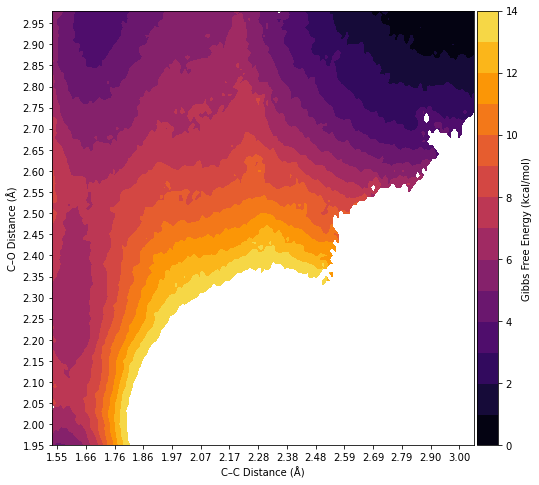

In [4]:
# this actually plots everything

DELTA = 1

fig = plt.figure(figsize=(8,8))
ax = fig.gca()

im = plt.contourf(E, levels=range(0,15,DELTA), cmap="inferno", vmin=0,vmax=15)

# labels should be ok
xticks = np.arange(0,NUMX,(NUMX-1)/31)
xticks=xticks[::2]
xlabels = np.linspace(1.45,3,len(xticks))

yticks = np.arange(0,NUMY,(NUMY-1)/21)
ylabels = np.linspace(1.95,3,len(yticks))

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels([f"{l:.2f}" for l in xlabels])#, rotation=45)
ax.set_yticklabels([f"{l:.2f}" for l in ylabels])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label("Gibbs Free Energy (kcal/mol)")

ax.set_ylabel("C–O Distance (Å)")
ax.set_xlabel("C–C Distance (Å)")
ax.set_xlim(8,151)
ax.set_ylim(0,103)

#plt.savefig("big_pes_7_12_21.png", bbox_inches=None, dpi=300)
plt.show()